# CA1: Dataframe Manipulation with Spotify Data
### Jony Karmakar

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [181]:
import matplotlib.pyplot as plt
# ---- Insert other imports ----
import pandas as pd
import numpy as np
import seaborn as sns

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [182]:
# Loading the dataset 

df_spotify_0 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory0.csv')

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [183]:
# Using help command 
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator

In [184]:
# Using help command 
help(pd.DataFrame.tail)

Help on function tail in module pandas.core.generic:

tail(self, n: 'int' = 5) -> 'Self'
    Return the last `n` rows.
    
    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.
    
    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    type of caller
        The last `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [185]:
print(df_spotify_0.head())
print(df_spotify_0.tail(10))

            endTime            artistName                        trackName  \
0  2022-12-03 02:02  Cigarettes After Sex                            Truly   
1  2022-12-03 02:02         Leonard Cohen  Take This Waltz - Paris Version   
2  2022-12-06 21:05          Vlad Holiday                 So Damn Into You   
3  2022-12-06 21:05                 Lorde                             Team   
4  2022-12-06 21:05         Ariana Grande                         Into You   

   msPlayed  
0   30000.0  
1    8210.0  
2   37895.0  
3    8984.0  
4    1221.0  
                endTime         artistName                     trackName  \
11949  2023-01-02 20:58      Ariana Grande                    six thirty   
11950  2023-01-02 20:58      Leonard Cohen          Thanks for the Dance   
11951  2023-01-02 20:59           Des Rocs          Used to the Darkness   
11952  2023-01-02 20:59  Caroline Polachek         Hit Me Where It Hurts   
11953  2023-01-02 20:59  Caroline Polachek         Hit Me Where It 

#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [186]:
# Formatting the endtime column to datatame dtype of pandas
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])

In [187]:
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0


#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [188]:
# Finding and showing the unique artists number
artist_name = df_spotify_0['artistName'].unique()
artist_name
print(f'Total No. Unique Artist: {len(artist_name)}')

Total No. Unique Artist: 495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [189]:
# Funding and showing the unique artists number
songs_name = df_spotify_0['trackName'].unique()
songs_name
print(f'Total No. Unique Songs: {len(songs_name)}')
len(songs_name)

Total No. Unique Songs: 1308


1308

### Part 1: Questions
Q1: Which columns are in the dataset? \
A1: There are 4 coulms in the dataset. \
a. endTime \
b. artistName \
c. trackName \
d. msPlayed \
Q2: What timeframe does the dataset span? \
A2: 2022-12-03 02:02  to 2023-01-02 20:59. \
Q3: How many unique artists are in the dataset? \
A3: 495 \
Q4: How many unique songs are in the dataset? \
A4: 1308

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [190]:
# Loading rest of the dataset
df_spotify_1 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory1.csv')
df_spotify_2 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory2.csv')
df_spotify_3 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory3.csv')
df_spotify_4 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory4.csv')
df_spotify_5 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory5.csv')
df_spotify_6 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory6.csv')
df_spotify_7 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory7.csv')
df_spotify_8 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory8.csv')
df_spotify_9 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory9.csv')
df_spotify_10 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory10.csv')
df_spotify_11 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory11.csv')
df_spotify_12 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory12.csv')
df_spotify_13 = pd.read_csv('/Users/jony/DAT200/assignment/spotify_data/streaminghistory13.csv')

In [191]:
# Formatting the endTime dtype to datetime
df_spotify_1['endTime'] = pd.to_datetime(df_spotify_1['endTime'])
df_spotify_2['endTime'] = pd.to_datetime(df_spotify_2['endTime'])
df_spotify_3['endTime'] = pd.to_datetime(df_spotify_3['endTime'])
df_spotify_4['endTime'] = pd.to_datetime(df_spotify_4['endTime'])
df_spotify_5['endTime'] = pd.to_datetime(df_spotify_5['endTime'])
df_spotify_6['endTime'] = pd.to_datetime(df_spotify_6['endTime'])
df_spotify_7['endTime'] = pd.to_datetime(df_spotify_7['endTime'])
df_spotify_8['endTime'] = pd.to_datetime(df_spotify_8['endTime'])
df_spotify_9['endTime'] = pd.to_datetime(df_spotify_9['endTime'])
df_spotify_10['endTime'] = pd.to_datetime(df_spotify_10['endTime'])
df_spotify_11['endTime'] = pd.to_datetime(df_spotify_11['endTime'])
df_spotify_12['endTime'] = pd.to_datetime(df_spotify_12['endTime'])
df_spotify_13['endTime'] = pd.to_datetime(df_spotify_13['endTime'])

In [192]:
# Making the list of the whole dataframe
dataframes = [df_spotify_0, df_spotify_1, df_spotify_2, df_spotify_3, df_spotify_4, df_spotify_5,
              df_spotify_6, df_spotify_7, df_spotify_8, df_spotify_9, df_spotify_10,
              df_spotify_11, df_spotify_12, df_spotify_13]

# Concatenating the all dataframe in df
df = pd.concat(dataframes, ignore_index=True)

In [193]:
df.head(20)

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05:00,Lorde,Team,8984.0
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0
5,2022-12-07 00:21:00,Caroline Polachek,Hit Me Where It Hurts,1648.0
6,2022-12-07 00:21:00,Kaizers Orchestra,Prosessen,348.0
7,2022-12-07 00:21:00,Vlad Holiday,So Damn Into You,1555.0
8,2022-12-07 00:21:00,Vlad Holiday,So Damn Into You,1486.0
9,2022-12-07 00:21:00,Ariana Grande,Best Mistake,8824.0


#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [194]:
# Sorting the dataframe based on the endTime column
df = df.sort_values('endTime', ascending=True)

#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [195]:
# Taking data of only 2023 to new dataframe
df2 = df[df['endTime'].dt.year == 2023]

In [196]:
df2.head(20)

,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0
10886,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",325.0
10887,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12293.0
10888,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22929.0
10893,2023-01-01 01:19:00,Regina Spektor,Us - 2005 Remaster,16670.0
10892,2023-01-01 01:19:00,Lorde,Solar Power,464.0


In [197]:
df2.tail(20)

,endTime,artistName,trackName,msPlayed
167419,2023-12-07 20:49:00,Lana Del Rey,Radio,214573.0
167420,2023-12-07 20:51:00,Mitski,Washing Machine Heart,128198.0
167421,2023-12-07 20:51:00,Pastel Ghost,Dark Beach,19752.0
167422,2023-12-07 20:51:00,Ariana Grande,needy,26220.0
167423,2023-12-07 21:12:00,Tame Impala,Eventually,318591.0
167424,2023-12-07 21:12:00,U2,With Or Without You,13626.0
167425,2023-12-07 21:12:00,grandson,Darkside,5404.0
167432,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,615.0
167431,2023-12-07 21:13:00,Lana Del Rey,Ride,1126.0
167433,2023-12-07 21:13:00,Childish Gambino,Les,2484.0


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [198]:
# Looking is there any null values in the dataframe or not
null_count = df2.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 18


In [199]:
# Removing the row wilth null values and storing in a different dataframe
df3 = df2.dropna()

In [200]:
# Again checking is there any null values in the dataframe or not
null_count = df3.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [201]:
# Adding new column named secPlayed which is conversion of miliseconds to seconds

secPlayed = []

for i in df3['msPlayed']:
    i = i/1000
    secPlayed.append(i)


df3.insert(4, 'secPlayed', secPlayed)

In [202]:
df3.head()

,endTime,artistName,trackName,msPlayed,secPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,139.0,0.139
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,487.0,0.487
10883,2023-01-01 01:17:00,Ariana Grande,positions,417.0,0.417
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2205.0,2.205
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0,0.278


In [203]:
# Dropping the msPlayed column

df3 = df3.drop('msPlayed', axis=1)

In [204]:
df3.head()

,endTime,artistName,trackName,secPlayed
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

In [205]:
# Creating a new DataFrame with only artistName and secPlayed column
artist_playtime_df = df3[['artistName', 'secPlayed']]

# Grouping by artistName and sum play time
artist_total_playtime = artist_playtime_df.groupby('artistName').sum()

# Sorting artists based on total play time
sorted_artists = artist_total_playtime.sort_values(by='secPlayed', ascending=False)

# Printing top ten artists
top_ten_artists = sorted_artists.head(10)

top_ten_artists


,secPlayed
artistName,
Ariana Grande,178996.003
Joji,137229.562
The Pretty Reckless,110293.430
Cage The Elephant,95587.575
Lana Del Rey,90543.113
Greta Van Fleet,88026.405
The Neighbourhood,85673.375
Gorillaz,84858.371
Led Zeppelin,77030.802


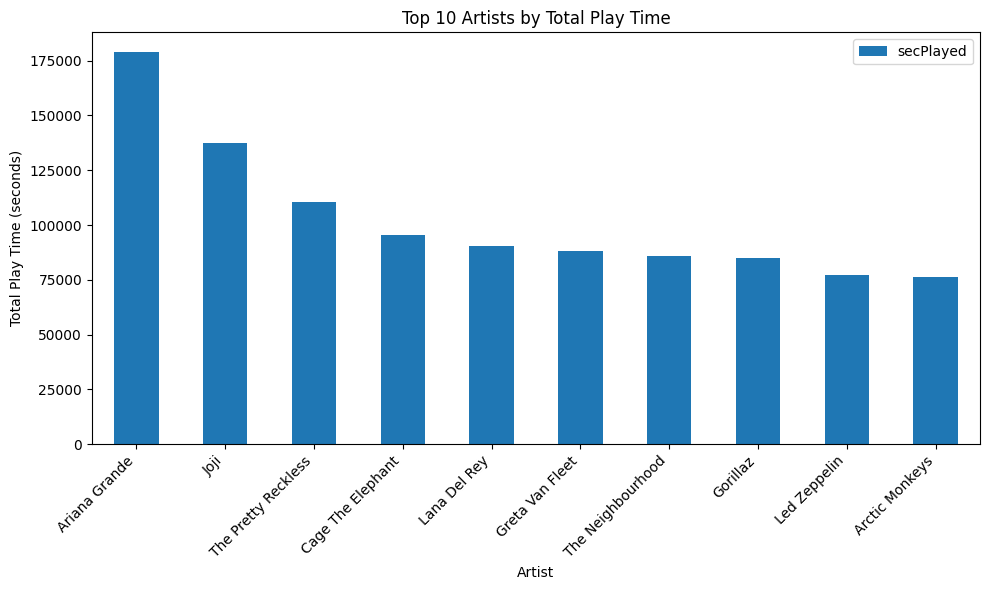

In [206]:
# Plotting the Top 10 Songs
top_ten_artists.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Artists by Total Play Time')
plt.xlabel('Artist')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

In [207]:
# Creating a new DataFrame with only trackName and secPlayed column
track_playtime_df = df3[['trackName', 'secPlayed']]

# Grouping by artistName and sum play time
track_total_playtime = track_playtime_df.groupby('trackName').sum()

# Sorting artists based on total play time
sorted_tracks = track_total_playtime.sort_values(by='secPlayed', ascending=False)

# Printing top ten artists
top_ten_tracks = sorted_tracks.head(10)

top_ten_tracks

,secPlayed
trackName,
Les,31403.364
O Children,24558.414
When the Levee Breaks - Remaster,22631.721
Heartbeat,22056.629
Afterthought,21599.564
A Change Is Gonna Come,20414.317
Bones,18860.916
FEEL.,18696.637
Bad Ones (feat. Tegan and Sara),18558.247


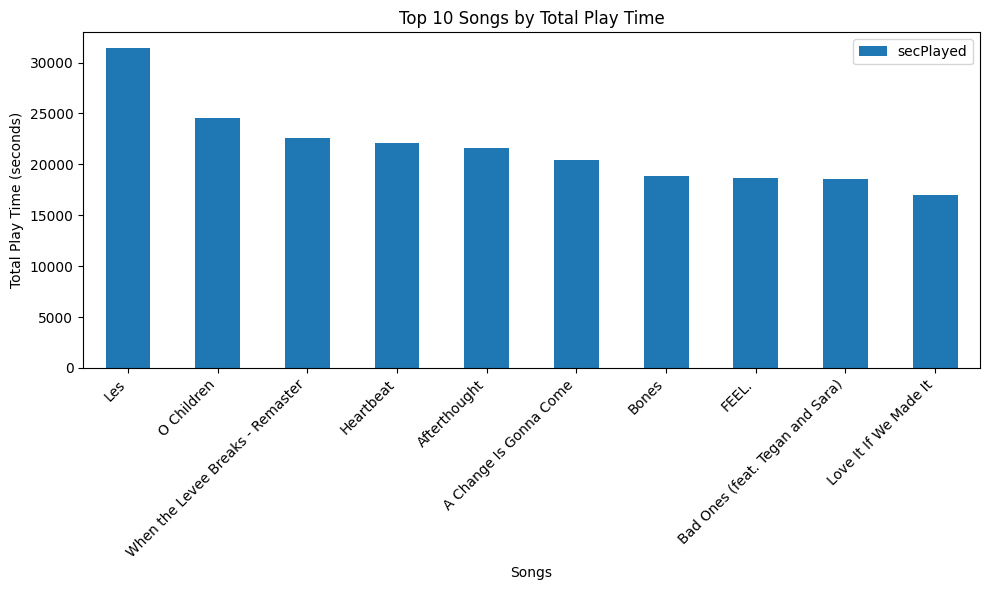

In [208]:
# Plotting the Top 10 Songs
top_ten_tracks.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Songs by Total Play Time')
plt.xlabel('Songs')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

In [ ]:
# Creating a new DataFrame with only endTime and secPlayed column
music_play_df = df3[['endTime', 'secPlayed']]

# Extracting the hours from the endTime
music_play_df['endHour'] = music_play_df['endTime'].dt.hour

# Grouping by the hours and total the play time
total_play_time_per_hour = music_play_df.groupby('endHour')['secPlayed'].sum()

# Grouping by the hours and average the play time
average_play_time_per_hour = music_play_df.groupby('endHour')['secPlayed'].mean()

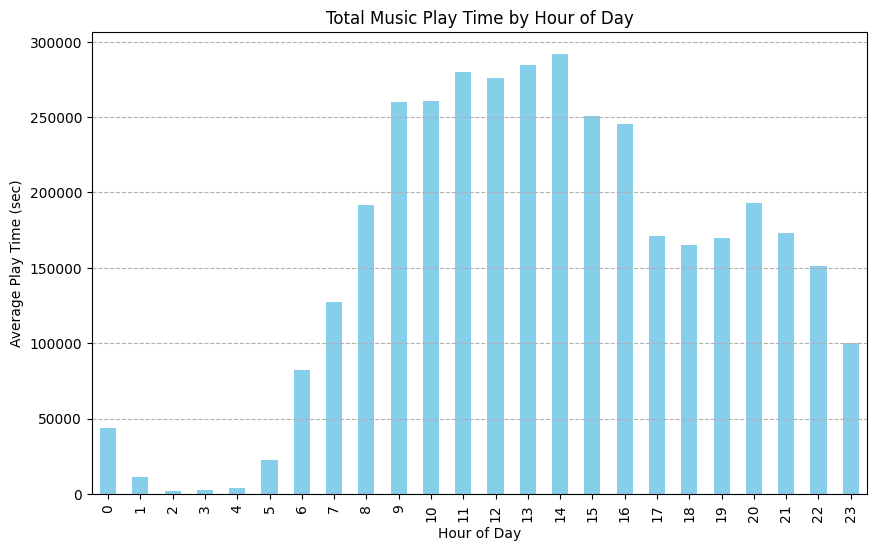

In [289]:
# Plot the result
plt.figure(figsize=(10, 6))
total_play_time_per_hour.plot(kind='bar', color='skyblue')
plt.title('Total Music Play Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Play Time (sec)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

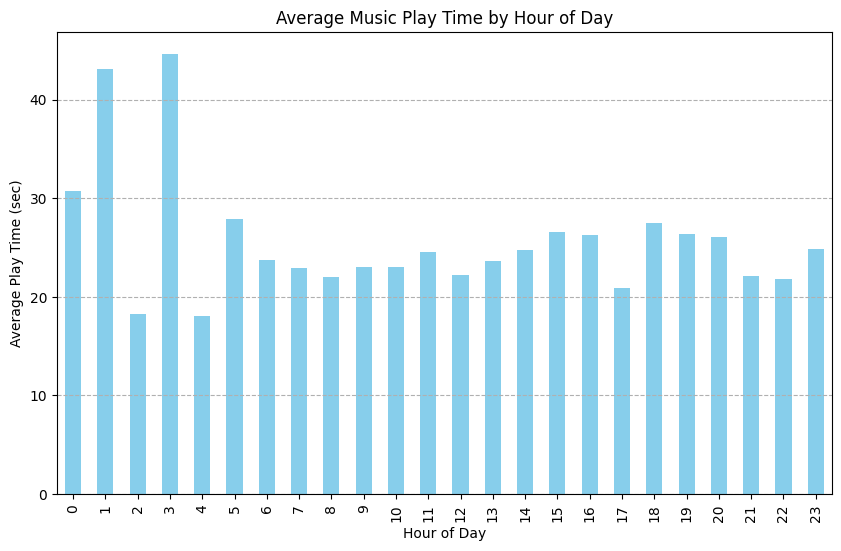

In [290]:
# Plot the result
plt.figure(figsize=(10, 6))
average_play_time_per_hour.plot(kind='bar', color='skyblue')
plt.title('Average Music Play Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Play Time (sec)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

# Observations
Here is one interesting thing to notice if we use the the mean function while groupby it showes more average time in hour 0 to 6 althogh total listening hour is less on that time which can be seen from the previous graph and this is also normal that at that time the user of this data must be sleeping or resting. But the acverage come like this because as there are less skipped song on that time and the average here is shown by the total number of songs(both skipped and unskipped).

So, in the below I tried to deal with it by divinde by the total number days.

In [313]:
# Finding the total number days when the music is listened i.e. unique days
days = music_play_df['endTime'].dt.day_of_year
unique_days = days.unique()
total_unique_days = len(unique_days)

In [314]:
# Getting average by dividing it by total number of days
mean_play_time_per_hour = total_play_time_per_hour/total_unique_days

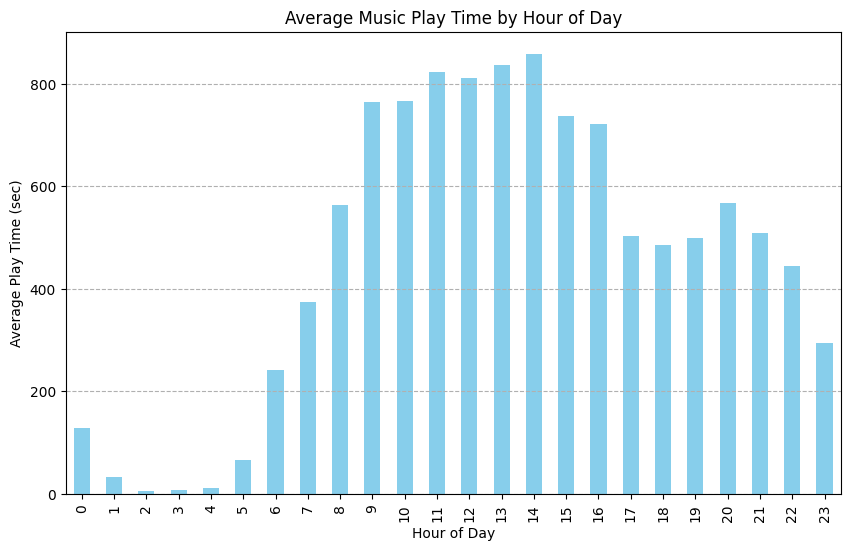

In [312]:
# Plot the result
plt.figure(figsize=(10, 6))
mean_play_time_per_hour.plot(kind='bar', color='skyblue')
plt.title('Average Music Play Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Play Time (sec)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

 Now this look this look more understandable that how much average time the user has spent on listening in every hour.

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

In [211]:
# Creating a new DataFrame with only Leonard Cohen and Rage Against The Machine
relevant_artists_df = df3[df3['artistName'].isin(['Leonard Cohen', 'Rage Against The Machine'])]

# Extracting the hours from the endTime
relevant_artists_df['hour'] = relevant_artists_df['endTime'].dt.hour

# Grouping by hour and artist, and sum the play time
hourly_playtime_comparison = relevant_artists_df.groupby(['hour', 'artistName'])['secPlayed'].sum().unstack()

/var/folders/2k/4yf6q3p91dn305kq0h_z85300000gn/T/ipykernel_63153/2126971822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_artists_df['hour'] = relevant_artists_df['endTime'].dt.hour


In [212]:
hourly_playtime_comparison

artistName,Leonard Cohen,Rage Against The Machine
hour,,
0,486.593,2.024
1,19.065,NaN
4,271.905,17.242
5,371.150,NaN
6,190.543,28.610
7,296.875,12.516
8,595.872,42.402
9,829.501,226.606
10,2068.587,335.398


<Figure size 1000x600 with 0 Axes>

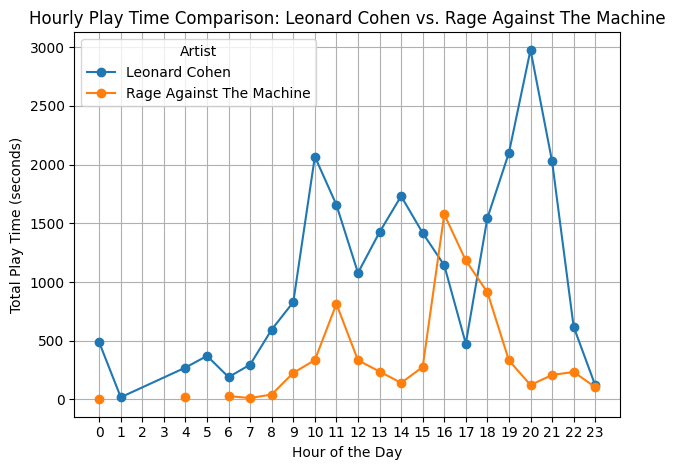

In [213]:
# Plotting the results
plt.figure(figsize=(10, 6))
hourly_playtime_comparison.plot(kind='line', marker='o', linestyle='-')
plt.title('Hourly Play Time Comparison: Leonard Cohen vs. Rage Against The Machine')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Play Time (seconds)')
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Artist')
plt.tight_layout()
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [214]:
# Adding new column skipped songs

skippedTrack = []

for i in df3['secPlayed']:
    if i < 30 :
        skippedTrack.append(1)
    else:
        skippedTrack.append(0)

df3.insert(4, 'skippedTrack', skippedTrack)

In [215]:
df3.head()

,endTime,artistName,trackName,secPlayed,skippedTrack
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1
10884,2023-01-01 01:17:00,Peach Pit,Being so Normal,2.205,1
10885,2023-01-01 01:17:00,Kelly Clarkson,"Santa, Can’t You Hear Me",0.278,1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

In [216]:
# Step 1: Group the DataFrame by the 'skipped' column and count the occurrences
skipped_counts = df3.groupby('skippedTrack').size()

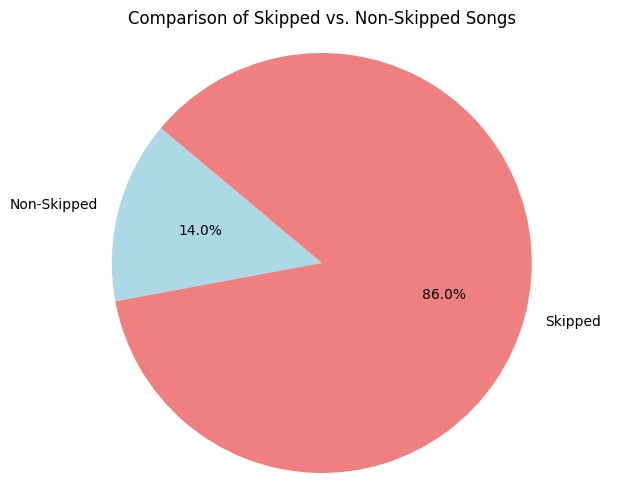

In [217]:
# Step 2: Plot the results in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(skipped_counts, labels=['Non-Skipped', 'Skipped'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Comparison of Skipped vs. Non-Skipped Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [218]:
# Grouping the DataFrame by the 'artistName' column
grouped_by_artist = df3.groupby('artistName')

# Calculating the total number of songs and the number of skipped songs for each artist
total_songs = grouped_by_artist.size()
skipped_songs = grouped_by_artist['skippedTrack'].sum()

# computing the percentage of skipped songs for each artist
skip_rate = (skipped_songs / total_songs) * 100

# Creating a new DataFrame to store the percentage of skipped songs for each artist
df_skipped = pd.DataFrame({'TotalSongs': total_songs, 'SkippedTrack': skipped_songs, 'SkipRate': skip_rate})

# Display the new DataFrame
df_skipped


,TotalSongs,SkippedTrack,SkipRate
artistName,,,
10cc,28,19,67.857143
2Pac,513,442,86.159844
3 Doors Down,2,1,50.000000
4 Non Blondes,122,88,72.131148
50 Cent,28,19,67.857143
...,...,...,...
squeeda,3,2,66.666667
tenkousei.,37,37,100.000000
trxxshed,2,1,50.000000


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [219]:
# Finding three top artists with lowest skip-rate
print(df_skipped['SkipRate'].nsmallest(3))

artistName
Gloria Gaynor     0.000000
Roc Boyz         11.111111
LACES            14.285714
Name: SkipRate, dtype: float64


In [237]:
# Finding three top artists with highest skip-rate
print(df_skipped['SkipRate'].nlargest(3))

artistName
A Problem Squared    100.0
Acid Ghost           100.0
Albert Hammond Jr    100.0
Name: SkipRate, dtype: float64


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [221]:
# Creating a dataframe with only rows with music by Ariana Grande
df_ariana = df3[df3['artistName'] == 'Ariana Grande']

In [222]:
df_ariana

,endTime,artistName,trackName,secPlayed,skippedTrack
10881,2023-01-01 01:17:00,Ariana Grande,7 rings,0.139,1
10882,2023-01-01 01:17:00,Ariana Grande,7 rings,0.487,1
10883,2023-01-01 01:17:00,Ariana Grande,positions,0.417,1
10887,2023-01-01 01:17:00,Ariana Grande,Santa Baby,12.293,1
10888,2023-01-01 01:17:00,Ariana Grande,Right There (feat. Big Sean),22.929,1
...,...,...,...,...,...
167415,2023-12-07 17:46:00,Ariana Grande,Almost Is Never Enough,28.483,1
167422,2023-12-07 20:51:00,Ariana Grande,needy,26.220,1
167428,2023-12-07 21:13:00,Ariana Grande,pete davidson,0.603,1
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448,1


In [223]:
df_ariana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19337 entries, 10881 to 167436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   endTime       19337 non-null  datetime64[ns]
 1   artistName    19337 non-null  object        
 2   trackName     19337 non-null  object        
 3   secPlayed     19337 non-null  float64       
 4   skippedTrack  19337 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 906.4+ KB


In [224]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156539 entries, 10881 to 167438
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   endTime       156539 non-null  datetime64[ns]
 1   artistName    156539 non-null  object        
 2   trackName     156539 non-null  object        
 3   secPlayed     156539 non-null  float64       
 4   skippedTrack  156539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 7.2+ MB


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

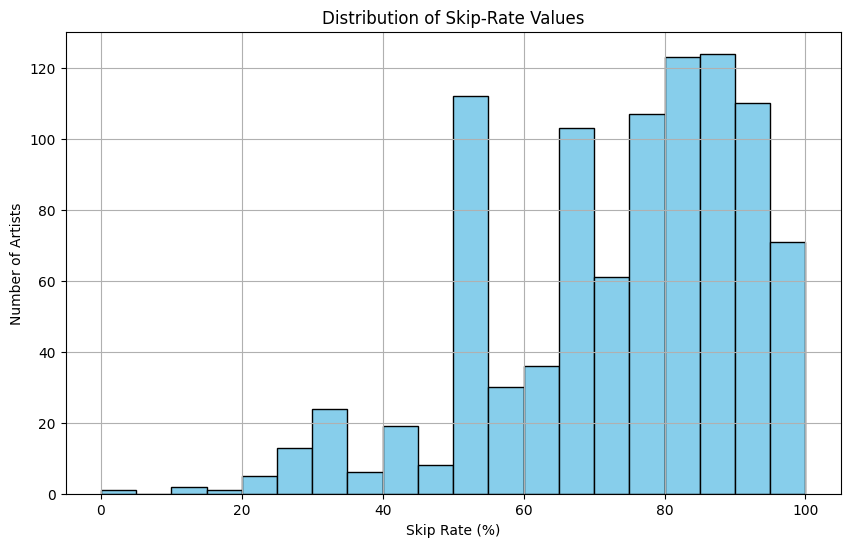

Skip rate for Ariana Grande: 99.52939959662822


In [225]:
# Plotting a histogram of skip-rate values
plt.figure(figsize=(10, 6))
plt.hist(df_skipped['SkipRate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Skip-Rate Values')
plt.xlabel('Skip Rate (%)')
plt.ylabel('Number of Artists')
plt.grid(True)
plt.show()

# Retrieving the skip rate for Ariana Grande
ariana_grande_skip_rate = df_skipped.loc['Ariana Grande', 'SkipRate']
print("Skip rate for Ariana Grande:", ariana_grande_skip_rate)

In [226]:
count_skipped_artist_df = df_skipped[df_skipped['SkipRate'] >= 90]

In [227]:
count_skipped_artist_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, A Problem Squared to Édith Piaf
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalSongs    181 non-null    int64  
 1   SkippedTrack  181 non-null    int64  
 2   SkipRate      181 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7+ KB


In [228]:
df_skipped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 10cc to Édith Piaf
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalSongs    956 non-null    int64  
 1   SkippedTrack  956 non-null    int64  
 2   SkipRate      956 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 62.2+ KB


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Answer1: As we can see skip rate is close to 100%, so a lot of songs of Ariana Grande is Skipped. Compare to the rest of the dataset we can see that 20% (181 out 956) of the artist's song skipped more than 80%. \
Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist? \
Answe2: In the dataset of 2023 spotify data we can see out of 156539 tracks there are 19337 tracks of Ariana Grande. And so many of songs are skipped so that makes Ariana the no. 1 artist.